# Step 0: Discovering the Dataset

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('/kaggle/input/churndataset/churn_dataset.csv')
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

In [3]:
df.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2091.144105,48.208336,0.347236,796.109576,2.225530,925.975019,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,272.676775,17.807163,0.997661,432.872102,0.660443,937.799129,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,73.000000,1.000000,0.000000,0.000000,1.000000,1.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1958.000000,36.000000,0.000000,409.000000,2.000000,176.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074407e+03,0.000000
50%,15150.500000,2154.000000,46.000000,0.000000,834.000000,2.000000,572.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,2292.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,2476.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [4]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
last_transaction                     0
dtype: int64

In [5]:
df['churn'].value_counts(normalize=True)

churn
0    0.814671
1    0.185329
Name: proportion, dtype: float64

In [6]:
df['gender'].value_counts(normalize=True)

gender
Male      0.594034
Female    0.405966
Name: proportion, dtype: float64

In [7]:
df['occupation'].value_counts(normalize=True)

occupation
self_employed    0.617483
salaried         0.236874
student          0.072716
retired          0.071514
company          0.001413
Name: proportion, dtype: float64

In [8]:
df['last_transaction']

0        2019-05-21
1        2019-11-01
2               NaT
3        2019-08-06
4        2019-11-03
            ...    
28377    2019-10-22
28378    2019-12-17
28379    2019-12-31
28380           NaT
28381    2019-11-02
Name: last_transaction, Length: 28382, dtype: object

# Step 1: Feature Engineering

In [9]:
df['last_transaction'] = pd.to_datetime(df['last_transaction'], errors='coerce')

# df.drop(columns=['dependents'], inplace=True)
df = df.dropna(subset=['last_transaction'])

num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(include='object').columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna("Unknown")

## A) Identity features

In [10]:
df.drop(columns=['customer_id'], inplace=True)
df.drop(columns=['branch_code'], inplace=True)

## B) Relationship and loyalty features

In [11]:
df['loyalty'] = (df['vintage'] - df['vintage'].min()) / (df['vintage'].max() - df['vintage'].min())
df.drop(columns=['vintage'], inplace=True)
df['loyalty']

0        0.843945
1        0.946733
3        0.938826
4        0.626717
5        0.769871
           ...   
28375    0.967541
28377    0.937162
28378    0.609238
28379    0.958385
28381    0.458593
Name: loyalty, Length: 25159, dtype: float64

In [12]:
reference_date = df['last_transaction'].max()
df['last_transaction'] = (
    reference_date - df['last_transaction']
).dt.days
df['last_transaction']

0        224
1         60
3        147
4         58
5         60
        ... 
28375     57
28377     70
28378     14
28379      0
28381     59
Name: last_transaction, Length: 25159, dtype: int64

In [13]:
df['engagement'] = (df['last_transaction'] - df['last_transaction'].min()) / (df['last_transaction'].max() - df['last_transaction'].min())
df.drop(columns=['last_transaction'], inplace=True)
df['engagement']

0        0.613699
1        0.164384
3        0.402740
4        0.158904
5        0.164384
           ...   
28375    0.156164
28377    0.191781
28378    0.038356
28379    0.000000
28381    0.161644
Name: engagement, Length: 25159, dtype: float64

In [14]:
df['engagement'] = 1 - df['engagement']
df['engagement']

0        0.386301
1        0.835616
3        0.597260
4        0.841096
5        0.835616
           ...   
28375    0.843836
28377    0.808219
28378    0.961644
28379    1.000000
28381    0.838356
Name: engagement, Length: 25159, dtype: float64

## C) Demographics

In [15]:
df['gender'].value_counts(normalize=True)

gender
Male       0.591717
Female     0.389960
Unknown    0.018323
Name: proportion, dtype: float64

In [16]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1, 'Unknown': 2})
df['gender']

0        0
1        0
3        2
4        0
5        1
        ..
28375    0
28377    1
28378    1
28379    0
28381    0
Name: gender, Length: 25159, dtype: int64

In [17]:
df['dependents'].value_counts(normalize=True)

dependents
0.0     0.830001
2.0     0.082237
1.0     0.052745
3.0     0.026233
4.0     0.006717
5.0     0.001351
6.0     0.000318
7.0     0.000119
9.0     0.000040
52.0    0.000040
36.0    0.000040
50.0    0.000040
8.0     0.000040
25.0    0.000040
32.0    0.000040
Name: proportion, dtype: float64

In [18]:
df['occupation'].value_counts(normalize=True)

occupation
self_employed    0.619420
salaried         0.241067
retired          0.070949
student          0.064510
Unknown          0.002703
company          0.001351
Name: proportion, dtype: float64

In [19]:
df['city'].value_counts(normalize=True)

city
1020.0    0.124250
1096.0    0.071863
834.0     0.068524
409.0     0.048094
146.0     0.045193
            ...   
1567.0    0.000040
850.0     0.000040
1433.0    0.000040
777.0     0.000040
677.0     0.000040
Name: proportion, Length: 1515, dtype: float64

In [20]:
df['customer_nw_category'].value_counts(normalize=True)

customer_nw_category
2    0.506777
3    0.357765
1    0.135458
Name: proportion, dtype: float64

## D) Balance features

### i. Current vs Previous

I will compare current_balance with previous_month_balance, big drop in balance means customer is leaving, stable or rising balance means customer is active.

In [21]:
df['balance_change'] = df['current_balance'] - df['previous_month_balance']
df['balance_ratio'] = df['current_balance'] / (df['previous_month_balance'] + 1e-6) # to avoid division by zero

In [22]:
df['balance_change']

0           0.00
1       -3397.24
3         622.12
4        -749.44
5        -147.55
          ...   
28375      62.33
28377       0.00
28378     153.78
28379    7947.73
28381   -1153.53
Name: balance_change, Length: 25159, dtype: float64

In [23]:
df['balance_ratio']

0        1.000000
1        0.613406
3        1.372574
4        0.553149
5        0.990387
           ...   
28375    1.008387
28377    1.000000
28378    1.041671
28379    1.138067
28381    0.646219
Name: balance_ratio, Length: 25159, dtype: float64

### ii. Trends over time 
I will compare average_monthly_balance_prevQ vs average_monthly_balance_prevQ2, if average balance is decreasing quarter over quarter, rhen risk of churn is higher.

In [24]:
df['avg_balance_diff'] = df['average_monthly_balance_prevQ'] - df['average_monthly_balance_prevQ2']
df['avg_balance_growth'] = df['avg_balance_diff'] / (df['average_monthly_balance_prevQ2'] + 1e-6)

In [25]:
df['avg_balance_diff']

0            9.64
1        -4620.15
3         1078.00
4         -227.81
5         1412.47
           ...   
28375     4567.45
28377     -505.51
28378     -196.72
28379    31519.00
28381    -1234.01
Name: avg_balance_diff, Length: 25159, dtype: float64

In [26]:
df['avg_balance_growth']

0        0.006653
1       -0.372010
3        1.070996
4       -0.121751
5        0.102362
           ...   
28375    1.299406
28377   -0.181336
28378   -0.050891
28379    1.437530
28381   -0.277465
Name: avg_balance_growth, Length: 25159, dtype: float64

### iii. Stability
We will look at how stable the balance is, customers with very unstable balances might be at risk

In [27]:
balance_cols = [
    'current_balance',
    'previous_month_balance',
    'previous_month_end_balance',
    'average_monthly_balance_prevQ',
    'average_monthly_balance_prevQ2'
]
df['balance_volatility'] = df[balance_cols].std(axis=1)

In [28]:
df['balance_volatility']

0            4.311139
1         2528.581644
3          544.904828
4          362.880277
5          820.923322
             ...     
28375     1817.835665
28377      818.610009
28378      161.354854
28379    17330.156595
28381      850.499378
Name: balance_volatility, Length: 25159, dtype: float64

## E) Credit features
Credit features help capture spending and income behavior of customer, which can indicate churn risk.

In [29]:
df['credit_change'] = df['current_month_credit'] - df['previous_month_credit']
df['credit_change']

0          0.00
1          0.00
3          0.00
4       -714.28
5          0.00
          ...  
28375    -89.59
28377      0.00
28378     -0.58
28379    783.78
28381     -7.33
Name: credit_change, Length: 25159, dtype: float64

In [30]:
df['credit_ratio'] = df['current_month_credit'] / (df['previous_month_credit'] + 1e-6)
df['credit_ratio']

0        0.999995
1        0.999998
3        0.999998
4        0.000462
5        0.999997
           ...   
28375    0.005660
28377    0.999997
28378    0.746725
28379    1.201846
28381    0.014785
Name: credit_ratio, Length: 25159, dtype: float64

## F) Debit features
High debit activity or sudden drop may signal churn risk.

In [31]:
df['debit_change'] = df['current_month_debit'] - df['previous_month_debit']
df['debit_change']

0           0.00
1        5385.71
3       -2142.86
4        -949.44
5         571.43
          ...   
28375     -79.84
28377       0.00
28378    -113.07
28379      96.43
28381    -379.69
Name: debit_change, Length: 25159, dtype: float64

In [32]:
df['debit_ratio'] = df['current_month_debit'] / (df['previous_month_debit'] + 1e-6)
df['debit_ratio']

0         0.999995
1        54.557179
3         0.000219
4         0.382703
5         2.997518
           ...    
28375     0.932513
28377     0.999997
28378     0.888499
28379     2.343036
28381     0.652963
Name: debit_ratio, Length: 25159, dtype: float64

## G) Dropping redundant features

In [33]:
df.columns

Index(['age', 'gender', 'dependents', 'occupation', 'city',
       'customer_nw_category', 'current_balance', 'previous_month_end_balance',
       'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
       'current_month_credit', 'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'current_month_balance',
       'previous_month_balance', 'churn', 'loyalty', 'engagement',
       'balance_change', 'balance_ratio', 'avg_balance_diff',
       'avg_balance_growth', 'balance_volatility', 'credit_change',
       'credit_ratio', 'debit_change', 'debit_ratio'],
      dtype='object')

In [34]:
df.drop(columns=[
    'current_balance',
    'previous_month_end_balance',
    'average_monthly_balance_prevQ',
    'average_monthly_balance_prevQ2',
    'current_month_balance',
    'previous_month_balance',
    'current_month_credit',
    'previous_month_credit',
    'current_month_debit',
    'previous_month_debit'
], inplace=True)

In [35]:
df.columns

Index(['age', 'gender', 'dependents', 'occupation', 'city',
       'customer_nw_category', 'churn', 'loyalty', 'engagement',
       'balance_change', 'balance_ratio', 'avg_balance_diff',
       'avg_balance_growth', 'balance_volatility', 'credit_change',
       'credit_ratio', 'debit_change', 'debit_ratio'],
      dtype='object')

In [36]:
df.head()

,age,gender,dependents,occupation,city,customer_nw_category,churn,loyalty,engagement,balance_change,balance_ratio,avg_balance_diff,avg_balance_growth,balance_volatility,credit_change,credit_ratio,debit_change,debit_ratio
0,66,0,0.0,self_employed,187.0,2,0,0.843945,0.386301,0.00,1.000000,9.64,0.006653,4.311139,0.00,0.999995,0.00,0.999995
1,35,0,0.0,self_employed,834.0,2,0,0.946733,0.835616,-3397.24,0.613406,-4620.15,-0.372010,2528.581644,0.00,0.999998,5385.71,54.557179
3,90,2,0.0,self_employed,1020.0,2,1,0.938826,0.597260,622.12,1.372574,1078.00,1.070996,544.904828,0.00,0.999998,-2142.86,0.000219
4,42,0,2.0,self_employed,1494.0,3,1,0.626717,0.841096,-749.44,0.553149,-227.81,-0.121751,362.880277,-714.28,0.000462,-949.44,0.382703
5,42,1,0.0,self_employed,1096.0,2,0,0.769871,0.835616,-147.55,0.990387,1412.47,0.102362,820.923322,0.00,0.999997,571.43,2.997518


In [37]:
df['churn'].value_counts(normalize=True)

churn
0    0.802814
1    0.197186
Name: proportion, dtype: float64

# Step 2: Training

In [38]:
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

from catboost import CatBoostClassifier, Pool

In [39]:
TARGET = "churn"

categorical_features = [
    "gender",
    "occupation",
    "city",
    "customer_nw_category"
]

numerical_features = [
    "age",
    "dependents",
    "loyalty",
    "engagement",
    "balance_change",
    "balance_ratio",
    "avg_balance_diff",
    "avg_balance_growth",
    "balance_volatility",
    "credit_change",
    "credit_ratio",
    "debit_change",
    "debit_ratio"
]

FEATURES = categorical_features + numerical_features

In [40]:
X = df[FEATURES]
y = df[TARGET]

In [41]:
N_FOLDS = 5
RANDOM_STATE = 42

folds = StratifiedKFold(
    n_splits=N_FOLDS,
    shuffle=True,
    random_state=RANDOM_STATE
)

oof_preds = np.zeros(len(X))
auc_scores = []

In [42]:
for col in categorical_features:
    X[col] = X[col].astype(str)

X[categorical_features] = X[categorical_features].fillna("Unknown").astype(str)

for fold, (train_idx, val_idx) in enumerate(folds.split(X, y)):
    print(f"\nFold {fold + 1}")

    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    train_pool = Pool(
        X_train,
        y_train,
        cat_features=categorical_features
    )

    val_pool = Pool(
        X_val,
        y_val,
        cat_features=categorical_features
    )

    model = CatBoostClassifier(
        iterations=1500,
        learning_rate=0.03,
        depth=6,
        loss_function="Logloss",
        eval_metric="AUC",
        class_weights=[1, 4],  # for churn imbalance
        random_seed=RANDOM_STATE,
        verbose=300
    )

    model.fit(train_pool, eval_set=val_pool)

    val_preds = model.predict_proba(X_val)[:, 1]
    oof_preds[val_idx] = val_preds

    fold_auc = roc_auc_score(y_val, val_preds)
    auc_scores.append(fold_auc)

    print(f"Fold AUC: {fold_auc:.4f}")

/tmp/ipykernel_94/3690765078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(str)
/tmp/ipykernel_94/3690765078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(str)
/tmp/ipykernel_94/3690765078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re


Fold 1
0:	test: 0.7714443	best: 0.7714443 (0)	total: 81.7ms	remaining: 2m 2s
300:	test: 0.8166448	best: 0.8169522 (281)	total: 7.34s	remaining: 29.2s
600:	test: 0.8165033	best: 0.8171853 (417)	total: 15s	remaining: 22.4s
900:	test: 0.8148036	best: 0.8171853 (417)	total: 22.9s	remaining: 15.2s
1200:	test: 0.8133903	best: 0.8171853 (417)	total: 30.9s	remaining: 7.68s
1499:	test: 0.8127276	best: 0.8171853 (417)	total: 38.7s	remaining: 0us

bestTest = 0.8171852543
bestIteration = 417

Shrink model to first 418 iterations.
Fold AUC: 0.8172

Fold 2
0:	test: 0.7697589	best: 0.7697589 (0)	total: 21.9ms	remaining: 32.8s
300:	test: 0.8271983	best: 0.8273472 (286)	total: 7.32s	remaining: 29.2s
600:	test: 0.8275032	best: 0.8286031 (491)	total: 15.1s	remaining: 22.6s
900:	test: 0.8277999	best: 0.8286031 (491)	total: 23s	remaining: 15.3s
1200:	test: 0.8255474	best: 0.8286031 (491)	total: 30.8s	remaining: 7.68s
1499:	test: 0.8234415	best: 0.8286031 (491)	total: 38.7s	remaining: 0us

bestTest = 0.828

In [43]:
print("\nCV AUC scores:", auc_scores)
print("Mean CV AUC:", np.mean(auc_scores))


CV AUC scores: [np.float64(0.8171852543117215), np.float64(0.8286030820824017), np.float64(0.8333714268604279), np.float64(0.8433151894905837), np.float64(0.8322285139247179)]
Mean CV AUC: 0.8309406933339705


Best Threshold: 0.609
Best F1-score: 0.594


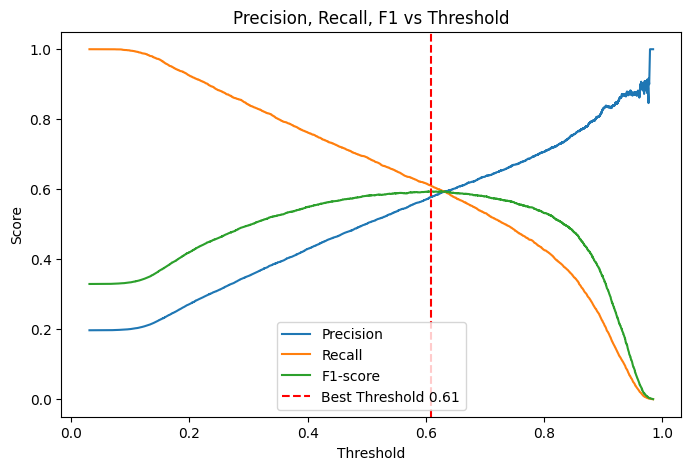

In [ ]:
from sklearn.metrics import precision_recall_curve, f1_score
import matplotlib.pyplot as plt
import numpy as np

y_true = y
y_prob = oof_preds  # from K-Fold CV

# Compute precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_true, y_prob)

# Compute F1 for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)

# Find threshold with maximum F1
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"Best Threshold: {best_threshold:.3f}")
print(f"Best F1-score: {best_f1:.3f}")

# Optional: plot precision-recall vs threshold
plt.figure(figsize=(8,5))
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.plot(thresholds, f1_scores[:-1], label="F1-score")
plt.axvline(best_threshold, color='red', linestyle='--', label=f'Best Threshold {best_threshold:.2f}')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall, F1 vs Threshold")
plt.legend()
plt.show()

In [45]:
y_pred_final = (y_prob >= best_threshold).astype(int)

print("\n Classification Report:")
print(classification_report(y, y_pred_final))

print("\n Confusion Matrix:")
print(confusion_matrix(y, y_pred_final))


 Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90     20198
           1       0.58      0.61      0.59      4961

    accuracy                           0.84     25159
   macro avg       0.74      0.75      0.75     25159
weighted avg       0.84      0.84      0.84     25159


 Confusion Matrix:
[[17982  2216]
 [ 1929  3032]]


In [46]:
model.save_model("catboost_churn_model.cbm")